In [2]:
import os
print(os.environ.get('CUDA_PATH'))
import torch
print("Torch version:",torch.__version__)
print(torch.version.cuda)
print(torch.backends.cudnn.enabled)
print(torch.cuda.is_available())
print(torch.cuda.device_count())

C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v10.2
Torch version: 1.10.1
10.2
True
True
1


In [4]:
# pip install pillow==9.0.0
from ultralytics import YOLO
# from IPython.display import display, Image

In [5]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.229 🚀 Python-3.8.18 torch-1.10.1 CUDA:0 (Quadro RTX 4000, 8192MiB)
Setup complete ✅ (32 CPUs, 127.7 GB RAM, 642.1/1860.7 GB disk)


#### Predictions with Trained YOLOv8 Model on Custom Dataset.
Test for image with optimizedd model as before.

In [6]:
import os
HOME = os.getcwd()
print(HOME)

c:\Users\Sealion\Desktop\kaggle\input\hubmap-hacking-the-human-vasculature


In [7]:
## Path
import os
bestModel = r"C:\Users\Sealion\Desktop\kaggle\working\runs\segment\train3\weights\best.pt"
testSample = r"C:\Users\Sealion\Desktop\kaggle\input\hubmap-hacking-the-human-vasculature\test\72e40acccadf.tif"
os.path.exists(bestModel)
os.path.exists(testSample)

True

In [8]:
!yolo task=segment mode=predict model="C:\Users\Sealion\Desktop\kaggle\working\runs\segment\train3\weights\best.pt" conf=0.25 source="C:\Users\Sealion\Desktop\kaggle\input\hubmap-hacking-the-human-vasculature\test\72e40acccadf.tif" save=True

Ultralytics YOLOv8.0.229 🚀 Python-3.8.18 torch-1.10.1 CUDA:0 (Quadro RTX 4000, 8192MiB)
YOLOv8x-seg summary (fused): 295 layers, 71723545 parameters, 0 gradients, 343.7 GFLOPs

image 1/1 C:\Users\Sealion\Desktop\kaggle\input\hubmap-hacking-the-human-vasculature\test\72e40acccadf.tif: 512x512 12 blood_vessels, 65.4ms
Speed: 3.0ms preprocess, 65.4ms inference, 17.2ms postprocess per image at shape (1, 3, 512, 512)
Results saved to runs\segment\predict34
💡 Learn more at https://docs.ultralytics.com/modes/predict


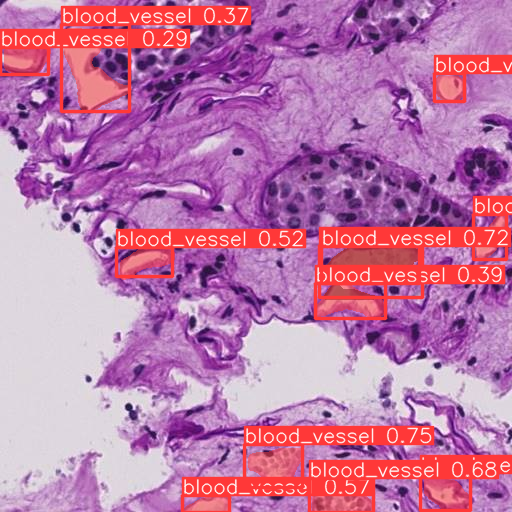

In [9]:
from PIL import Image
res = r"C:\Users\Sealion\Desktop\kaggle\input\hubmap-hacking-the-human-vasculature\runs\segment\predict28\72e40acccadf.tif"
img = Image.open(res, 'r')
display(img)

#### Prediction on video

In [10]:
import cv2

video_path = r"C:\Users\Sealion\Desktop\kaggle\input\hubmap-hacking-the-human-vasculature\test\tissueVideo.mp4"
cap = cv2.VideoCapture(video_path)
ret, frame = cap.read()
H, W, _ = frame.shape
video_path_out = r"C:\Users\Sealion\Desktop\kaggle\input\hubmap-hacking-the-human-vasculature\test\finalVideo.mp4"
out = cv2.VideoWriter(video_path_out, cv2.VideoWriter_fourcc(*'MP4V'), int(cap.get(cv2.CAP_PROP_FPS)), (W, H))

# Load a model
model_path = r"C:\Users\Sealion\Desktop\kaggle\working\runs\segment\train3\weights\best.pt"
model = YOLO(model_path)  # load a custom model

threshold = 0.1
while ret:
    results = model(frame)[0]
    for result in results.boxes.data.tolist():
        x1, y1, x2, y2, score, class_id = result

        if score > threshold:
            cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 4)
            cv2.putText(frame, results.names[int(class_id)].upper(), (int(x1), int(y1 - 10)),
                        cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 255, 0), 3, cv2.LINE_AA)
    out.write(frame)
    ret, frame = cap.read()

cap.release()
out.release()


0: 320x512 (no detections), 48.8ms
Speed: 5.5ms preprocess, 48.8ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 512)

0: 320x512 (no detections), 39.9ms
Speed: 2.0ms preprocess, 39.9ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 512)

0: 320x512 (no detections), 30.1ms
Speed: 2.0ms preprocess, 30.1ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 512)

0: 320x512 (no detections), 31.3ms
Speed: 1.0ms preprocess, 31.3ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 512)

0: 320x512 (no detections), 30.3ms
Speed: 2.0ms preprocess, 30.3ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 512)

0: 320x512 (no detections), 30.0ms
Speed: 2.0ms preprocess, 30.0ms inference, 0.0ms postprocess per image at shape (1, 3, 320, 512)

0: 320x512 (no detections), 30.4ms
Speed: 1.0ms preprocess, 30.4ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 512)

0: 320x512 (no detections), 27.2ms
Speed: 1.0ms preprocess, 27.2ms i

In [11]:
# pip install IPython
from ipywidgets import Video, Image
from IPython.display import display, Video
import numpy as np
import cv2
import base64

In [13]:
!ffmpeg -i {r"C:\Users\Sealion\Desktop\kaggle\input\hubmap-hacking-the-human-vasculature\test\finalVideo.mp4"} -vcodec libx264 {"last.mp4"}

ffmpeg version 6.1 Copyright (c) 2000-2023 the FFmpeg developers
  built with clang version 17.0.5
  configuration: --prefix=/d/bld/ffmpeg_1700971347970/_h_env/Library --cc=clang.exe --cxx=clang++.exe --nm=llvm-nm --ar=llvm-ar --disable-doc --disable-openssl --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libfontconfig --enable-libopenh264 --enable-libdav1d --ld=lld-link --target-os=win64 --enable-cross-compile --toolchain=msvc --host-cc=clang.exe --extra-libs=ucrt.lib --extra-libs=vcruntime.lib --extra-libs=oldnames.lib --strip=llvm-strip --disable-stripping --host-extralibs= --enable-gpl --enable-libx264 --enable-libx265 --enable-libaom --enable-libsvtav1 --enable-libxml2 --enable-pic --enable-shared --disable-static --enable-version3 --enable-zlib --enable-libopus --pkg-config=/d/bld/ffmpeg_1700971347970/_build_env/Library/bin/pkg-config
  libavutil      58. 29.100 / 58. 29.100
  libavcodec     60. 31.102 / 60. 31.102
  libavformat    60. 16.100 / 60. 1

In [15]:
Video("last.mp4", width=562, height=562)

#### Another simple method.

In [21]:
HOME = os.getcwd()
print(HOME)

c:\Users\Sealion\Desktop\kaggle\input\hubmap-hacking-the-human-vasculature


In [56]:
os.path.exists(model_path)

True

In [58]:

os.path.exists(".\working\runs\segment\train3\weights\best.pt'")
# model_path

False

In [59]:
!yolo segment predict model="C:\Users\Sealion\Desktop\kaggle\working\runs\segment\train3\weights\best.pt" source="C:\Users\Sealion\Desktop\kaggle\input\hubmap-hacking-the-human-vasculature\test\tissueVideo.mp4" save=True

Ultralytics YOLOv8.0.229 🚀 Python-3.8.18 torch-1.10.1 CUDA:0 (Quadro RTX 4000, 8192MiB)
YOLOv8x-seg summary (fused): 295 layers, 71723545 parameters, 0 gradients, 343.7 GFLOPs

video 1/1 (1/855) C:\Users\Sealion\Desktop\kaggle\input\hubmap-hacking-the-human-vasculature\test\tissueVideo.mp4: 320x512 (no detections), 45.7ms
video 1/1 (2/855) C:\Users\Sealion\Desktop\kaggle\input\hubmap-hacking-the-human-vasculature\test\tissueVideo.mp4: 320x512 (no detections), 37.0ms
video 1/1 (3/855) C:\Users\Sealion\Desktop\kaggle\input\hubmap-hacking-the-human-vasculature\test\tissueVideo.mp4: 320x512 (no detections), 36.6ms
video 1/1 (4/855) C:\Users\Sealion\Desktop\kaggle\input\hubmap-hacking-the-human-vasculature\test\tissueVideo.mp4: 320x512 (no detections), 37.3ms
video 1/1 (5/855) C:\Users\Sealion\Desktop\kaggle\input\hubmap-hacking-the-human-vasculature\test\tissueVideo.mp4: 320x512 (no detections), 33.9ms
video 1/1 (6/855) C:\Users\Sealion\Desktop\kaggle\input\hubmap-hacking-the-human-vascula

In [62]:
!ffmpeg -i {r"C:\Users\Sealion\Desktop\kaggle\input\hubmap-hacking-the-human-vasculature\runs\segment\predict35\tissueVideo.avi"} -vcodec libx264 {"last2.mp4"}

ffmpeg version 6.1 Copyright (c) 2000-2023 the FFmpeg developers
  built with clang version 17.0.5
  configuration: --prefix=/d/bld/ffmpeg_1700971347970/_h_env/Library --cc=clang.exe --cxx=clang++.exe --nm=llvm-nm --ar=llvm-ar --disable-doc --disable-openssl --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libfontconfig --enable-libopenh264 --enable-libdav1d --ld=lld-link --target-os=win64 --enable-cross-compile --toolchain=msvc --host-cc=clang.exe --extra-libs=ucrt.lib --extra-libs=vcruntime.lib --extra-libs=oldnames.lib --strip=llvm-strip --disable-stripping --host-extralibs= --enable-gpl --enable-libx264 --enable-libx265 --enable-libaom --enable-libsvtav1 --enable-libxml2 --enable-pic --enable-shared --disable-static --enable-version3 --enable-zlib --enable-libopus --pkg-config=/d/bld/ffmpeg_1700971347970/_build_env/Library/bin/pkg-config
  libavutil      58. 29.100 / 58. 29.100
  libavcodec     60. 31.102 / 60. 31.102
  libavformat    60. 16.100 / 60. 1

In [63]:
Video("last2.mp4", width=562, height=562)

#### Ackknowledge:
1. Kaggle for dataset sources.
2. Shuttershock for free video sample.
3. Youtube for computer vision tutorial.
4. This project just for practice purpose only.
All the steps need to be further optimized.
